In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('news_FR.csv')

In [3]:
df=data[0:1000]

In [4]:
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
995,8473,Clintons Are Under Multiple FBI Investigations...,Clintons Are Under Multiple FBI Investigations...,FAKE
996,5606,"First Iraqi Troops Enter Mosul, But Fighting R...",Military: Goal Is to 'Liberate' Eastern Bank o...,FAKE
997,5753,SHOCK VIDEO : Hillary Needs Help Climbing ONE ...,SHOCK VIDEO : Hillary Needs Help Climbing ONE ...,FAKE
998,2775,"After vowing to end two wars, Obama may leave ...",President Obama’s decision to expand the U.S. ...,REAL


In [5]:
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
995,8473,Clintons Are Under Multiple FBI Investigations...,Clintons Are Under Multiple FBI Investigations...,FAKE
996,5606,"First Iraqi Troops Enter Mosul, But Fighting R...",Military: Goal Is to 'Liberate' Eastern Bank o...,FAKE
997,5753,SHOCK VIDEO : Hillary Needs Help Climbing ONE ...,SHOCK VIDEO : Hillary Needs Help Climbing ONE ...,FAKE
998,2775,"After vowing to end two wars, Obama may leave ...",President Obama’s decision to expand the U.S. ...,REAL


In [6]:
import nltk
import re

In [7]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
stop=set(stopwords.words('english'))
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [9]:
from nltk.stem.porter import PorterStemmer

In [10]:
portStem = PorterStemmer()

In [11]:
def stemming(words):
    stemmedContent = re.sub('[^a-zA-Z]',' ',words) #only considering the Alphabets and converting other characters into spaces from 'news' column
    stemmedContent = stemmedContent.lower() #Making all the words lowercase
    stemmedContent = stemmedContent.split() #Spliting the string into list based on whitespaces
    stemmedContent = [portStem.stem(word) for word in stemmedContent 
                       if not word in stopwords.words('english')] #Applying the stemming process and converting word into its root word
    stemmedContent = ' '.join(stemmedContent)
    return stemmedContent

In [12]:
df['text'] = df['text'] .apply(stemming)

<ipython-input-12-d73213ca50e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'] .apply(stemming)


In [13]:
X=df['text']

In [14]:
# stop = stopwords.words('english')

# df['text'].apply(lambda x: ' '.join([portStem.stem(word) for word in  stemmedContent.split() if word not in stop]))

In [15]:
# import re
# from bs4 import BeautifulSoup
# from tqdm import tqdm
# pre_text = []
# food = ""
# business = ""
# sports = ""
# for x in tqdm(range(len(df))):
    
#     s = df["headline"][x] + " " + df["short_description"][x] 
#     s = [e.lower() for e in s.split() if e.lower() not in stop]
#     if(df["category"][x]=="FOOD & DRINK"):
#         food = food + "".join(s)+ " "
#     if(df["category"][x]=="BUSINESS"):
#         business = business + "".join(s)+ " "
#     if(df["category"][x]=="SPORTS"):
#         sports = sports + "".join(s)+ " "
#     pre_text.append(s)
  
# print(pre_text)
df.text = df.apply(lambda row: " ".join(re.sub("[^a-zA-Z]+", " ", row.text).split()), 1)
pre_text=[]
for x in range(len(df)):
      s=df['text'][x]
      s = [e for e in s.split() if e not in stop]
      pre_text.append(s)

#pre_text

df['text']

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0      daniel greenfield shillman journal fellow free...
1      googl pinterest digg linkedin reddit stumbleup...
2      u secretari state john f kerri said monday sto...
3      kayde king kaydeek novemb lesson tonight dem l...
4      primari day new york front runner hillari clin...
                             ...                        
995    clinton multipl fbi investig agent stymi http ...
996    militari goal liber eastern bank tigri river j...
997    shock video hillari need help climb one singl ...
998    presid obama decis expand u war effort iraq sy...
999    geoengineeringwatch org global climat engin pr...
Name: text, Length: 1000, dtype: object

In [16]:
import gensim

In [17]:
dictionary = gensim.corpora.Dictionary(pre_text)

In [18]:
bow_corpus = [dictionary.doc2bow(doc) for doc in pre_text ]

In [19]:
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 10, 
                                   id2word = dictionary,                                    
                                   passes = 50,
                                   workers = 2)

In [20]:
import re
topics=[]
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    topics.append(topic)
    print("\n")
#print(topics)
topic1=[]
for i in range(len(topics)):
  x=re.sub("[^a-zA-Z]+", " ",topics[i])
  topic1.append(x)
  

Topic: 0 
Words: 0.006*"peopl" + 0.006*"american" + 0.005*"america" + 0.005*"world" + 0.004*"muslim" + 0.004*"one" + 0.004*"us" + 0.004*"know" + 0.004*"time" + 0.004*"war"


Topic: 1 
Words: 0.010*"said" + 0.008*"nuclear" + 0.007*"state" + 0.006*"u" + 0.005*"russian" + 0.005*"china" + 0.005*"weapon" + 0.005*"war" + 0.005*"use" + 0.004*"russia"


Topic: 2 
Words: 0.025*"clinton" + 0.013*"trump" + 0.010*"email" + 0.009*"hillari" + 0.007*"said" + 0.006*"fbi" + 0.006*"investig" + 0.005*"state" + 0.005*"elect" + 0.005*"donald"


Topic: 3 
Words: 0.008*"peopl" + 0.007*"like" + 0.007*"elect" + 0.006*"one" + 0.006*"get" + 0.005*"polit" + 0.005*"parti" + 0.005*"go" + 0.004*"make" + 0.004*"american"


Topic: 4 
Words: 0.011*"said" + 0.005*"one" + 0.004*"year" + 0.004*"would" + 0.004*"could" + 0.004*"author" + 0.004*"new" + 0.004*"two" + 0.004*"use" + 0.003*"say"


Topic: 5 
Words: 0.026*"obama" + 0.010*"presid" + 0.008*"women" + 0.006*"hous" + 0.006*"white" + 0.005*"would" + 0.004*"democrat" + 0

In [21]:
cluster1=topic1[0]
#news=str(list(zip(*News))[0])


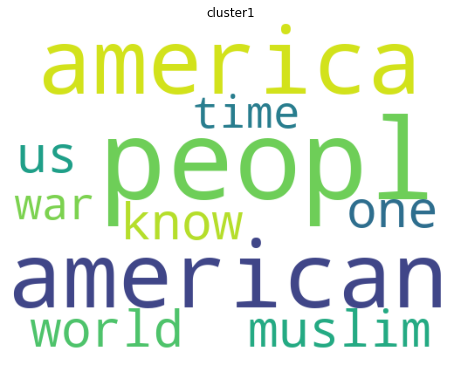

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512, 
                    height = 384
                        ).generate(cluster1)
plt.imshow(wordcloud) # image show
plt.title("cluster1")
plt.axis('off') # to off the axis of x and y
plt.show()

In [23]:
cluster2=topic1[1]

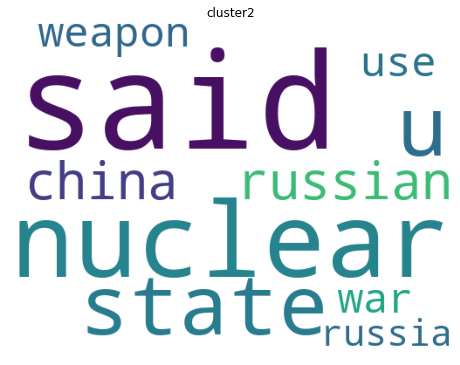

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512, 
                    height = 384
                        ).generate(cluster2)
plt.imshow(wordcloud) # image show
plt.title("cluster2")
plt.axis('off') # to off the axis of x and y
plt.show()

In [25]:
cluster3=topic1[2]

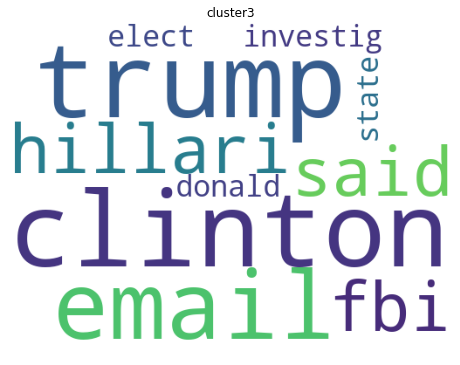

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512, 
                    height = 384
                        ).generate(cluster3)
plt.imshow(wordcloud) # image show
plt.title("cluster3")
plt.axis('off') # to off the axis of x and y
plt.show()

In [27]:
cluster4=topic1[3]

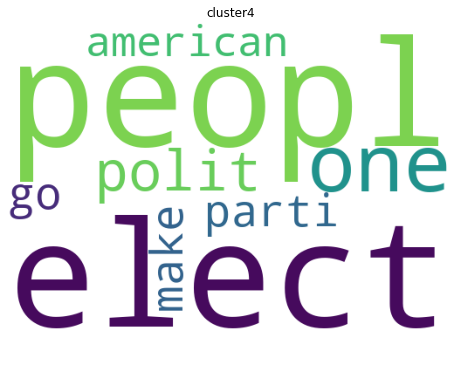

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512, 
                    height = 384
                        ).generate(cluster4)
plt.imshow(wordcloud) # image show
plt.title("cluster4")
plt.axis('off') # to off the axis of x and y
plt.show()

In [29]:
cluster5=topic1[4]

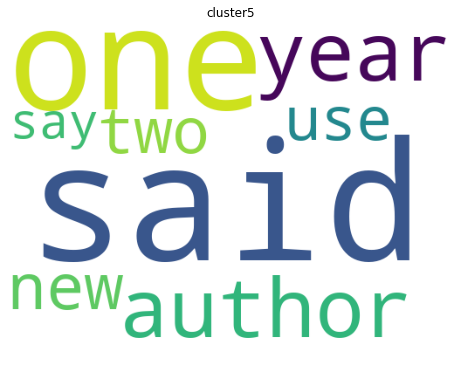

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512, 
                    height = 384
                        ).generate(cluster5)
plt.imshow(wordcloud) # image show
plt.title("cluster5")
plt.axis('off') # to off the axis of x and y
plt.show()

In [31]:
cluster6=topic1[5]

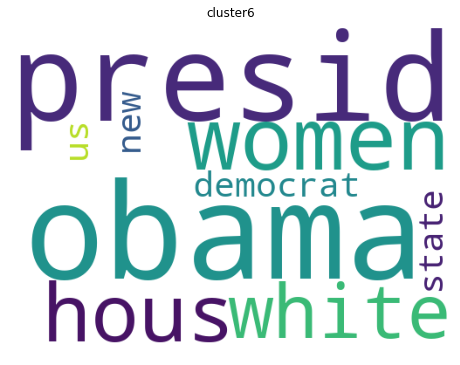

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512, 
                    height = 384
                        ).generate(cluster6)
plt.imshow(wordcloud) # image show
plt.title("cluster6")
plt.axis('off') # to off the axis of x and y
plt.show()

In [33]:
cluster7=topic1[6]

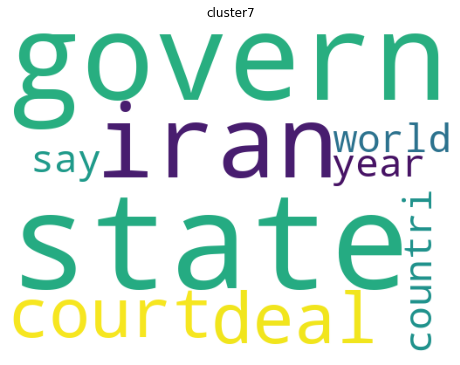

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512, 
                    height = 384
                        ).generate(cluster7)
plt.imshow(wordcloud) # image show
plt.title("cluster7")
plt.axis('off') # to off the axis of x and y
plt.show()

In [35]:
cluster8=topic1[7]

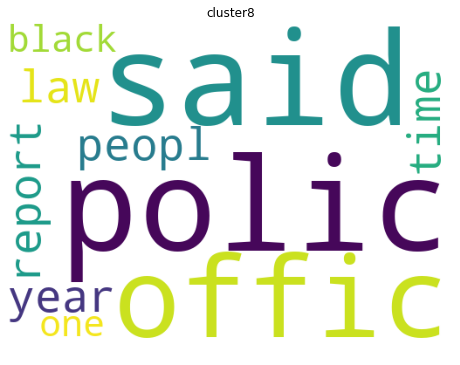

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512, 
                    height = 384
                        ).generate(cluster8)
plt.imshow(wordcloud) # image show
plt.title("cluster8")
plt.axis('off') # to off the axis of x and y
plt.show()

In [37]:
cluster9=topic1[8]

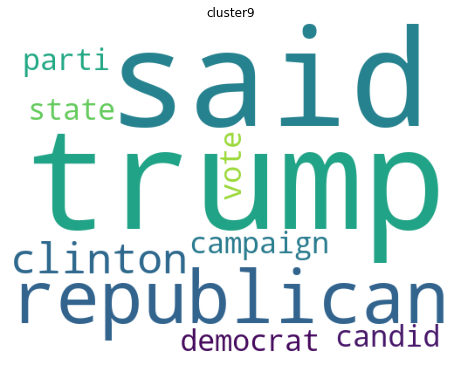

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512, 
                    height = 384
                        ).generate(cluster9)
plt.imshow(wordcloud) # image show
plt.title("cluster9")
plt.axis('off') # to off the axis of x and y
plt.show()

In [39]:
cluster10=topic1[9]

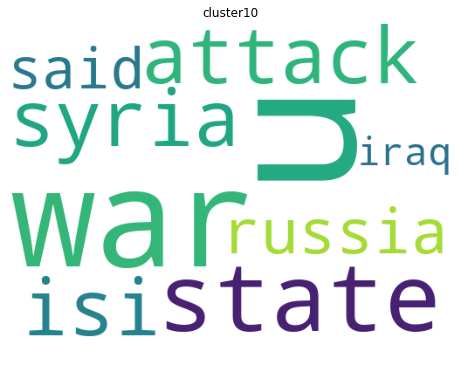

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512, 
                    height = 384
                        ).generate(cluster10)
plt.imshow(wordcloud) # image show
plt.title("cluster10")
plt.axis('off') # to off the axis of x and y
plt.show()

In [41]:
pip install bertopic[visualization]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 90 kB 3.6 MB/s 
     |████████████████████████████████| 5.2 MB 30.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 662 kB 30.5 MB/s 
     |████████████████████████████████| 85 kB 4.4 MB/s 
     |████████████████████████████████| 88 kB 6.5 MB/s 
     |████████████████████████████████| 5.8 MB 36.9 MB/s 
     |████████████████████████████████| 1.3 MB 47.0 MB/s 
     |████████████████████████████████| 182 kB 48.2 MB/s 
     |████████████████████████████████| 7.6 MB 1.3 MB/s 
     |████████████████████████████████| 1.1 MB 45.0 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp38-cp38-linux_x86_64.whl size=2700826 sha256=bbe7ccb1d0758ca775c5d88923830af7373d9aee1d33ca825bf9298ecfc168ef
  Stored in directory: /root/.cache/p

In [42]:
from bertopic import BERTopic

In [43]:

df.text = df.apply(lambda row: " ".join(filter(lambda x:x[0]!="@", row.text.split())), 1)
df.text = df.apply(lambda row: " ".join(re.sub("[^a-zA-Z]+", " ", row.text).split()), 1)
pre=df.text.tolist()

In [44]:
#pre

In [45]:
topic_model = BERTopic(embedding_model='all-MiniLM-L6-v2',verbose=True,language="english")
topics, probs = topic_model.fit_transform(pre)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2022-12-05 04:38:43,270 - BERTopic - Transformed documents to Embeddings
2022-12-05 04:38:56,506 - BERTopic - Reduced dimensionality
2022-12-05 04:38:56,576 - BERTopic - Clustered reduced embeddings


In [46]:
topic_model.get_topic_freq()

,Topic,Count
0,-1,426
1,0,74
2,1,67
3,2,64
4,3,39
5,4,36
6,5,35
7,6,34
8,7,28
9,8,24


In [47]:
topic_model.get_topic(0)

[('clinton', 0.054567418418672756),
 ('email', 0.04193008664416984),
 ('fbi', 0.033663744805111646),
 ('hillari', 0.026674809931205978),
 ('investig', 0.025287497787603256),
 ('comey', 0.023839464456241806),
 ('com', 0.01843305913536332),
 ('depart', 0.01582326084095565),
 ('said', 0.01542664278577488),
 ('foundat', 0.015032075035498168)]

In [48]:
topic_model.get_topic(1)

[('cruz', 0.04758849798368696),
 ('bush', 0.0396008855252592),
 ('trump', 0.03715207860434464),
 ('rubio', 0.03612285053061978),
 ('republican', 0.0289062669954635),
 ('said', 0.02452192726946133),
 ('campaign', 0.02286405396520732),
 ('candid', 0.021596387442126618),
 ('kasich', 0.021097048007981702),
 ('gop', 0.01860722331180441)]

In [86]:

topic_model.get_topic(3)

[('food', 0.02673575427956422),
 ('vitamin', 0.026313368042787853),
 ('health', 0.022118919333681937),
 ('use', 0.016438099048898255),
 ('one', 0.014635264057542268),
 ('wage', 0.01462797769656426),
 ('care', 0.014182544359724516),
 ('stretch', 0.014120574131593623),
 ('get', 0.014001639264878282),
 ('eat', 0.013811925667552976)]

In [50]:
topic_model.visualize_topics()


In [51]:
topic_model.get_topic(0)

[('clinton', 0.054567418418672756),
 ('email', 0.04193008664416984),
 ('fbi', 0.033663744805111646),
 ('hillari', 0.026674809931205978),
 ('investig', 0.025287497787603256),
 ('comey', 0.023839464456241806),
 ('com', 0.01843305913536332),
 ('depart', 0.01582326084095565),
 ('said', 0.01542664278577488),
 ('foundat', 0.015032075035498168)]

In [52]:

News=topic_model.get_topic(0)
news=str(list(zip(*News))[0])


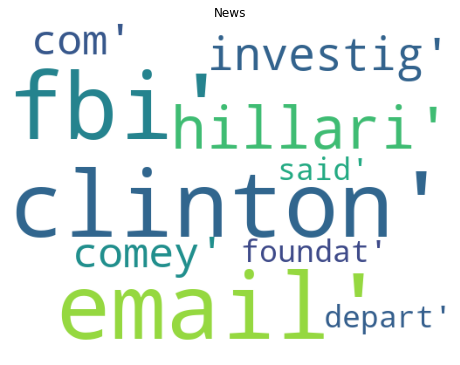

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512, 
                    height = 384
                        ).generate(news)
plt.imshow(wordcloud) # image show
plt.title("News")
plt.axis('off') # to off the axis of x and y
plt.show()

In [87]:
Food=topic_model.get_topic(3)
food=str(list(zip(*Food))[0])

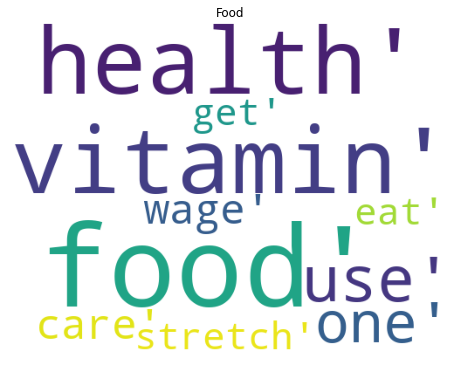

In [88]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512,
                    height = 384
                        ).generate(food)
plt.imshow(wordcloud) # image show
plt.title("Food")
plt.axis('off') # to off the axis of x and y
plt.show()

In [56]:
stop = stopwords.words('english')

df['text'] = df['text'].apply(lambda x: ' '.join([portStem.stem(word) for word in x.split() if word not in (stop)]))

In [57]:
X

0      daniel greenfield shillman journal fellow free...
1      googl pinterest digg linkedin reddit stumbleup...
2      u secretari state john f kerri said monday sto...
3      kayd king kaydeek novemb lesson tonight dem lo...
4      primari day new york front runner hillari clin...
                             ...                        
995    clinton multipl fbi investig agent stymi http ...
996    militari goal liber eastern bank tigri river j...
997    shock video hillari need help climb one singl ...
998    presid obama deci expand u war effort iraq syr...
999    geoengineeringwatch org global climat engin pr...
Name: text, Length: 1000, dtype: object

In [58]:
labels=df['label']

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X, labels, test_size=0.2, random_state=7)

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer()

X_train=tfidf_vectorizer.fit_transform(x_train) 
X_test=tfidf_vectorizer.transform(x_test)

In [61]:
from sklearn.linear_model import PassiveAggressiveClassifier
classifier=PassiveAggressiveClassifier()


In [62]:
from sklearn.metrics import accuracy_score
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,0)}%')


Accuracy: 94.0%


In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred,labels=['FAKE','REAL'])

array([[103,   5],
       [  8,  84]])

In [64]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [65]:
from sklearn.metrics import accuracy_score
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,0)}%')

Accuracy: 90.0%


In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred,labels=['FAKE','REAL'])

array([[103,   5],
       [ 16,  76]])

In [67]:
from sklearn.cross_validation import KFold

ModuleNotFoundError: ignored

In [ ]:
import numpy as np
score_lr=cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), df.text, labels,cv=3)
print(score_lr)
print("Avg :",np.average(score_lr))